# Convolutional Neural Network for Text Classification

Citation: http://www.davidsbatista.net/blog/2018/03/31/SentenceClassificationConvNets/

ConvNets were initially developed in the neural network image processing community where they achieved break-through results in recognising an object from a pre-defined category (e.g., cat, bicycle, etc.).

A Convolutional Neural Network typically involves two operations, which can be though of as feature extractors: convolution and pooling. The output of this sequence of operations is then typically connected to a fully connected layer which is in principle the same as the traditional multi-layer perceptron neural network 

In [10]:
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

In [ ]:
embeddings_index = {}
with open('glove/glove.6B.300d.txt', encoding="utf8") as f:
    line = f.readline()
    while line:
        values = line.split()
        word = values[0]
        try:
           coefs = np.asarray(values[1:], dtype='float32')
           embeddings_index[word] = coefs
        except ValueError:
           pass
        line = f.readline()


In [ ]:
df = pd.read_csv('../data/preprocessed.csv', index_col=False)
df.dropna(inplace = True)

In [ ]:
df.head()

In [ ]:
# From Preprocess.ipynb got vocabulary_size
vocabulary_size = 103726
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
data = pad_sequences(sequences, maxlen=100)

In [ ]:
labels = df['ReviewSentiment'].tolist()

In [ ]:
embedding_matrix = np.zeros((vocabulary_size, 300))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 300, input_length=100, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))

model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))

model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))

model_glove.add(Flatten())

model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

class_weight = {0: 1.0,
                1: 3.5}
history = model_glove.fit(data, np.array(labels), validation_split=0.4, class_weight=class_weight, epochs=10)

In [ ]:
model_glove.save('model/cnn2_glove_e20')

In [ ]:
np.save('model/cnn_history_e20.npy',history.history)

In [3]:
history=np.load('model/cnn_history_e20.npy',allow_pickle='TRUE').item()

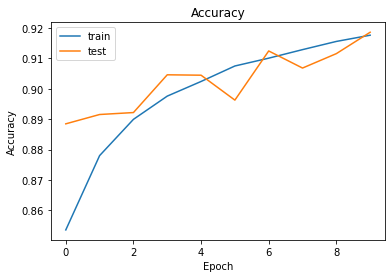

In [8]:
# plot accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

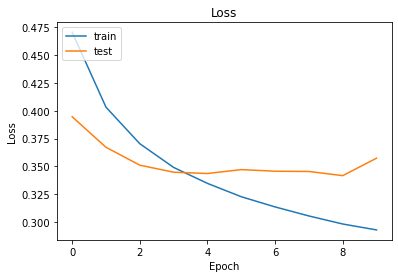

In [9]:
# Plot loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
history

{'val_loss': [0.39455083148163345,
  0.3671317901126686,
  0.35102322331796826,
  0.3447251045749364,
  0.34354452155423465,
  0.3470525072732619,
  0.3456244331915362,
  0.34538360767893683,
  0.3416352260850661,
  0.3573165271787416],
 'val_accuracy': [0.8884730339050293,
  0.891542911529541,
  0.8921850323677063,
  0.9046140313148499,
  0.9044821262359619,
  0.8962796330451965,
  0.9124602675437927,
  0.9068350791931152,
  0.9115806221961975,
  0.9186220169067383],
 'loss': [0.4704713741058329,
  0.40313959088620993,
  0.3703076873112972,
  0.3490192888375016,
  0.3346873734613254,
  0.32269545931270377,
  0.31353682125155263,
  0.30542109289104613,
  0.29819347073426056,
  0.29287893898830225],
 'accuracy': [0.8535515,
  0.8780138,
  0.88994735,
  0.89759713,
  0.9024175,
  0.90751344,
  0.9100878,
  0.91289675,
  0.9155972,
  0.9176467]}